# Environment setup

In [18]:
%cd
# %pwd
%cd /Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter
# %pwd
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5


/Users/nardo
/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter
fatal: destination path 'yolov5' already exists and is not an empty directory.
/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5


In [19]:
%pip install -qr requirements.txt  # install
%pip install roboflow
%pip install opencv-python==4.5.5.64

from roboflow import Roboflow
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-128-ge8a9c5a Python-3.8.12 torch-1.12.1 CPU


Setup complete ✅ (4 CPUs, 8.0 GB RAM, 181.7/233.5 GB disk)


# Place to put your dataset code here

In [20]:
os.environ["DATASET_DIRECTORY"] = "/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/datasets"
# rf = Roboflow(api_key="N6BLYmALrZnv9R94uWiQ")
# project = rf.workspace("university-of-adelaide-wt6zr").project("qfly_test")
# dataset = project.version(5).download("yolov5")

rf = Roboflow(api_key="N6BLYmALrZnv9R94uWiQ")
project = rf.workspace("university-of-adelaide-wt6zr").project("sardi_pupae_demo")
dataset = project.version(3).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/datasets/SARDI_pupae_demo-3 in yolov5pytorch:: 100%|██████████| 20/20 [00:00<00:00, 1274.55it/s]


# Training section

In [21]:
%pwd
%cd /Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5
!python train.py --img 1024 --batch 32 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5
train: weights=yolov5s.pt, cfg=, data=/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/datasets/SARDI_pupae_demo-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 107 (delta 73), reused 77 (delta 65), pack-reused 17
Receiving objects: 100% (107/107), 52.93 KiB | 215.00 KiB/s, done.


# use the model to test our image


In [25]:
model = 22
only_show_box = False
back_up = False

if model == 1:
  model_name = ""
else:
  model_name = str(model)

target = "runs/train/exp"+model_name+"/weights/best.pt"

if only_show_box == True:
  box_setting = "--hide-labels --hide-conf"
else:
  box_setting = ""

if only_show_box == True:
  back = ""
else:
  back = "--exist-ok"

%cd /Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5

# print(target)
!python detect.py --weights {target} --img 1024 --conf 0.5 --iou 0.1 --source {dataset.location}/test/images {box_setting} {back} --save-txt  --line-thickness 1
# !python detect.py --weights {target} --img 1024 --conf 0.5 --iou 0.1 --source {dataset.location}/test/images --hide-labels --hide-conf  --save-txt  --line-thickness 1


/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5
detect: weights=['runs/train/exp22/weights/best.pt'], source=/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/datasets/SARDI_pupae_demo-3/test/images, data=data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.5, iou_thres=0.1, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-128-ge8a9c5a Python-3.8.12 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/datasets/SARDI_pupae_demo-3/test/images/processed-288c71c8-8805-40ad-aafb-cfad3a1c0fac_32MieIBy_jpg.rf.2e5d3988fbe2b9fc37cf4eed9fc06c8f.jpg: 1024x1024 40 pupaes, 1297.7ms
Spe

# Show result

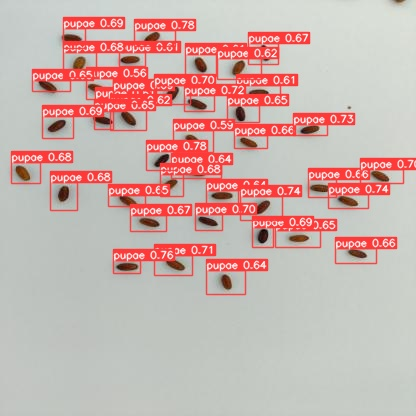

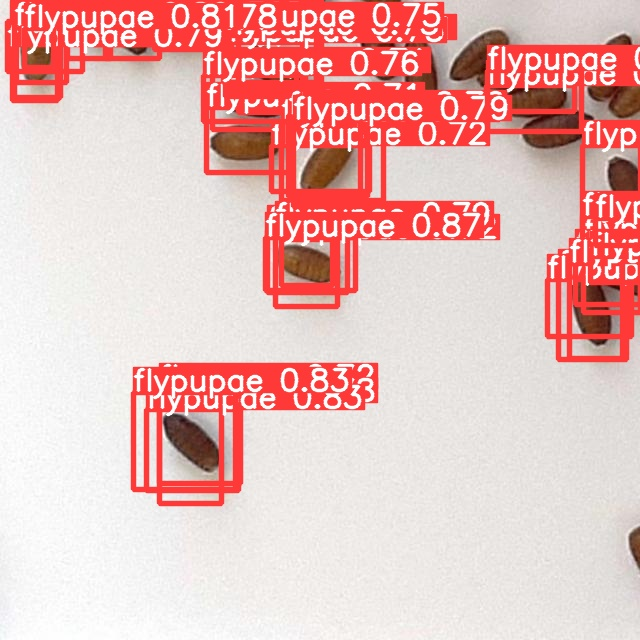

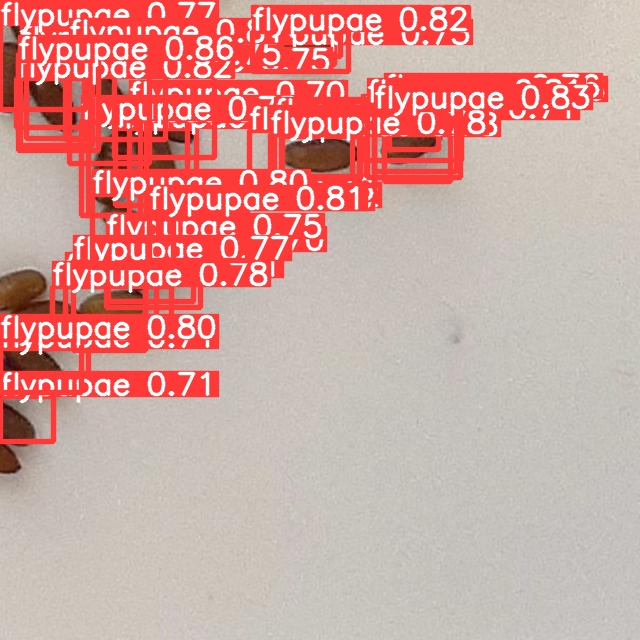



Number of pupae in imageprocessed-288c71c8-8805-40ad-aafb-cfad3a1c0fac_32MieIBy_jpg.rf.2e5d3988fbe2b9fc37cf4eed9fc06c8f: 
 80
Number of pupae in image1_jpg.rf.82ce2aa254b56c1cb703c9e9141f9e44: 
 38
Number of pupae in image4_jpg.rf.678eca9b440b02eb05daef2463c55752: 
 44


In [30]:
exp_version = 1

if back_up == False:
  exp_version = 1
  
if exp_version == 1:
  exp_name = ""
else:
  exp_name = str(exp_version)

import glob
from pathlib import Path
from IPython.display import Image, display

# %cd /content/pupae_detector/yolov5
for imageName in glob.glob('/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5/runs/detect/exp'+str(exp_name)+'/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    

for txt in glob.glob('/Users/nardo/Desktop/2022_2/INTERN/SARDI_pupae_counter/yolov5/runs/detect/exp'+str(exp_name)+'/labels/*.txt'): #assuming TXT
    Num = 0
    fp = open(txt, "r")
    Num = len(fp.readlines())
    print("Number of pupae in image"+ Path(txt).stem +": \n", Num)